<a href="https://colab.research.google.com/github/DogwonLee/Datatone/blob/main/%EC%9D%B4%EB%8F%84%EA%B6%8C_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 뜯어보기

In [1]:
import pandas as pd

In [7]:
events = pd.read_csv('/content/events1.csv')
events

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29
...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08


In [5]:
items = pd.read_csv('/content/items.csv')
items

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11
...,...,...,...,...,...,...
1376,1376,Google Tritan Bottle Gray,Google,NaN,Shop by Brand,12
1377,1377,White Google Cloud Tumbler,Google,NaN,Shop by Brand,27
1378,1378,Google Separating Keyring,Google,NaN,Accessories,6
1379,1379,Google Mountain View Campus Bottle,Google,NaN,Apparel,14


In [4]:
users = pd.read_csv('/content/users.csv')
users

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38
...,...,...,...
270149,270149,0,2020-11-10 01:12:59
270150,270150,0,2020-11-04 08:16:05
270151,270151,0,2020-11-04 17:25:31
270152,270152,0,2020-11-04 20:20:03


#시각화

In [14]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

##Events

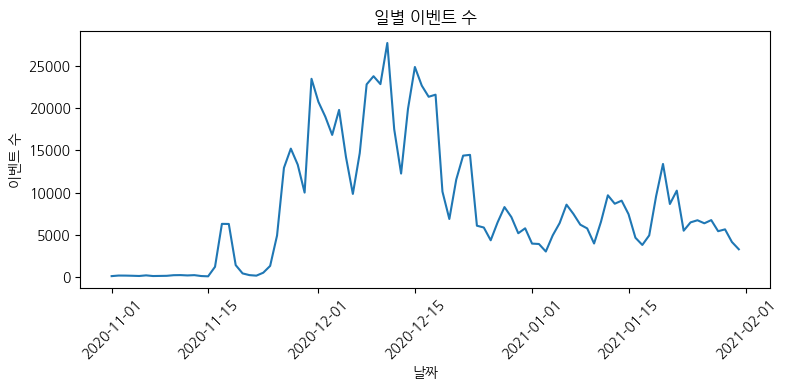

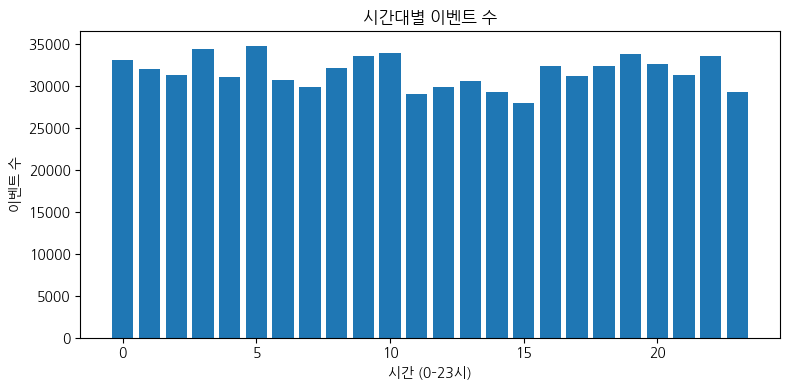

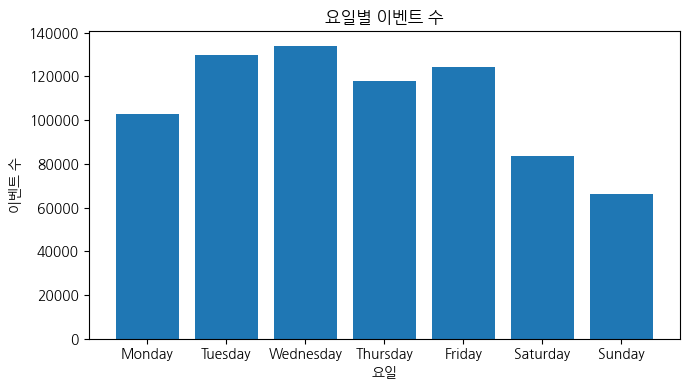

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
df = pd.read_csv('/content/events1.csv')

# datetime 변환
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 🔹 (1) 날짜별 이벤트 수
daily = df.groupby(df['date'].dt.date).size()
plt.figure(figsize=(8,4))
plt.plot(daily.index, daily.values)
plt.title('일별 이벤트 수')
plt.xlabel('날짜')
plt.ylabel('이벤트 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔹 (2) 시간대별 이벤트 수
hourly = df.groupby(df['date'].dt.hour).size()
plt.figure(figsize=(8,4))
plt.bar(hourly.index, hourly.values)
plt.title('시간대별 이벤트 수')
plt.xlabel('시간 (0–23시)')
plt.ylabel('이벤트 수')
plt.tight_layout()
plt.show()

# 🔹 (3) 요일별 이벤트 수
weekday = df.groupby(df['date'].dt.day_name()).size()
weekday = weekday.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(7,4))
plt.bar(weekday.index, weekday.values)
plt.title('요일별 이벤트 수')
plt.xlabel('요일')
plt.ylabel('이벤트 수')
plt.tight_layout()
plt.show()
